In [28]:
from plate_layout.plate import Well, Plate, QCPlate
from plate_layout.study import Study
from plate_layout.logger import logger
import pandas as pd
import numpy as np
import logging
from pathlib import Path

from dataclasses import asdict

logger.setLevel(logging.DEBUG)

In [29]:
p = Plate(plate_id=3)
p.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


,name,plate_id,coordinate,index,rgb_color
0,A1,3,"(0, 0)",0,"(1, 1, 1)"
1,A2,3,"(0, 1)",1,"(1, 1, 1)"
2,A3,3,"(0, 2)",2,"(1, 1, 1)"
3,A4,3,"(0, 3)",3,"(1, 1, 1)"
4,A5,3,"(0, 4)",4,"(1, 1, 1)"
...,...,...,...,...,...
91,H8,3,"(7, 7)",91,"(1, 1, 1)"
92,H9,3,"(7, 8)",92,"(1, 1, 1)"
93,H10,3,"(7, 9)",93,"(1, 1, 1)"
94,H11,3,"(7, 10)",94,"(1, 1, 1)"


In [30]:
qcp = QCPlate(QC_config="./data/plate_config_dynamic.toml")

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ./data/plate_config_dynamic.toml
[   DEBUG] --- {'QC': {'start_with_QC_round': True, 'run_QC_after_n_specimens': 11, 'names': {'EC': 'EC: External_Control_(matrix)', 'PB': 'PB: Paper_Blank', 'PO': 'PO: Pooled_specimens'}, 'patterns': {'then_alternating': [['EC', 'PB'], ['EC', 'PO']]}}}
[    INFO] --- Creating dynamic plate layout with QC samples.
[   DEBUG] --- Setting up dynamic QC scheme from config file
[   DEBUG] --- Round 1: ['EC', 'PB']
[   DEBUG] --- Round 2: ['EC', 'PO']
[   DEBUG] --- Round 3: ['EC', 'PB']
[   DEBUG] --- Round 4: ['EC', 'PO']
[   DEBUG] --- Round 5: ['EC', 'PB']
[   DEBUG] --- Round 6: ['EC', 'PO']
[   DEBUG] --- Round 7: ['EC', 'PB']
[   DEBUG] --- Round 8: ['EC', 'PO']
[   DEBUG] --- Well A1: {'QC': True, 'sample_code': 'EC', 'sample_type': 'EC: External_Control_(matrix)', 'sample_name': 'EC1'}
[   DEBUG] --- Well A2: {'QC': True, 'sample_code': 'PB', 'sample_ty

In [31]:
qcp.capacity

80

In [32]:
qcp._index_to_coordinates_map[0]

(0, 0)

In [33]:
w = Well(metadata={"nickname": "kalle", "sample": "plasma"}, index=1)
w.as_dict()

{'name': 'A1',
 'plate_id': 1,
 'coordinate': (0, 0),
 'index': 1,
 'rgb_color': (1, 1, 1),
 'nickname': 'kalle',
 'sample': 'plasma'}

In [34]:
w.index


1

In [35]:
p[0].as_dict()

{'name': 'A1',
 'plate_id': 3,
 'coordinate': (0, 0),
 'index': 0,
 'rgb_color': (1, 1, 1)}

In [36]:

print(p)

Plate ID: 3
Dimensions: 8 rows x 12 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12']
 ['B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'B12']
 ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12']
 ['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12']
 ['E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'E10' 'E11' 'E12']
 ['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10' 'F11' 'F12']
 ['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11' 'G12']
 ['H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'H7' 'H8' 'H9' 'H10' 'H11' 'H12']]


In [37]:
p[23]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [38]:
p["B12"]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [39]:
p[(1,11)]

Well(name='B12', plate_id=3, coordinate=(1, 11), index=23, rgb_color=(1, 1, 1), metadata={})

In [40]:
organs = ["liver", "lung", "stomach", "kidney", "eye", "brain", "spleen", "bone", "muscle", "skin"]
import random
for ind, well in enumerate(p):
    well.metadata["organ"] = random.sample(organs, 1)[0]

In [41]:
p.as_dataframe()

,name,plate_id,coordinate,index,rgb_color,organ
0,A1,3,"(0, 0)",0,"(1, 1, 1)",eye
1,A2,3,"(0, 1)",1,"(1, 1, 1)",spleen
2,A3,3,"(0, 2)",2,"(1, 1, 1)",bone
3,A4,3,"(0, 3)",3,"(1, 1, 1)",stomach
4,A5,3,"(0, 4)",4,"(1, 1, 1)",spleen
...,...,...,...,...,...,...
91,H8,3,"(7, 7)",91,"(1, 1, 1)",liver
92,H9,3,"(7, 8)",92,"(1, 1, 1)",spleen
93,H10,3,"(7, 9)",93,"(1, 1, 1)",muscle
94,H11,3,"(7, 10)",94,"(1, 1, 1)",skin


In [42]:
p.get_metadata_as_numpy_array("rgb_color")

array([[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)],
       [(1, 1

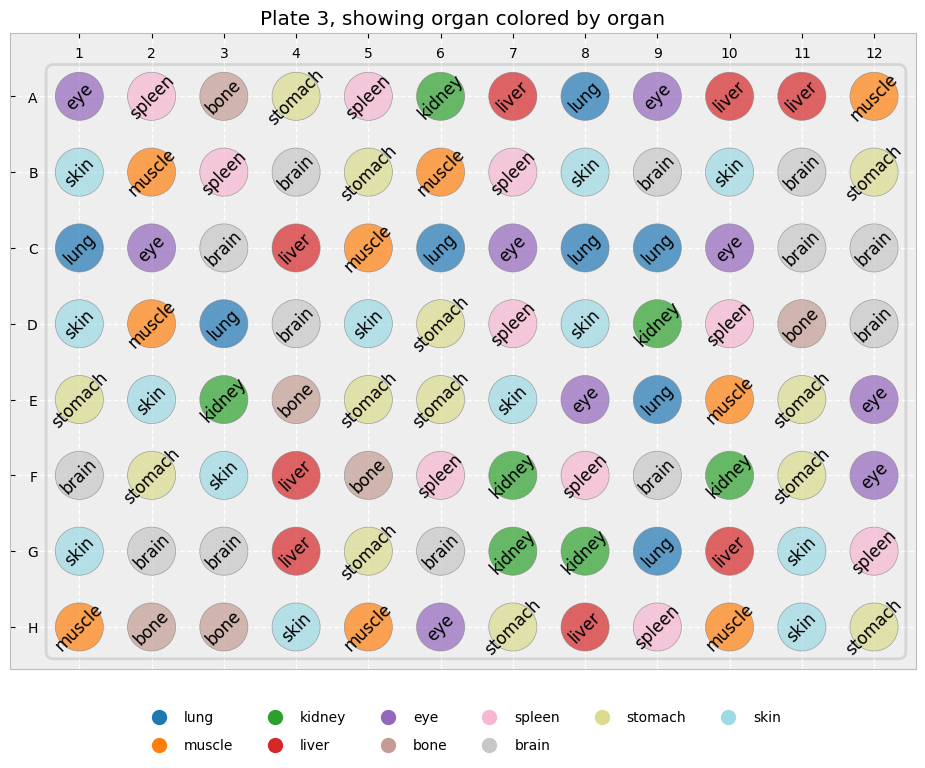

In [43]:
fig = p.as_figure(color_metadata_key="organ", annotation_metadata_key="organ", rotation=45, fontsize=12)

In [44]:
p.to_file("./")

[    INFO] --- Writing to file:
	plate_3.csv


In [45]:
study_sample_file = Path("./data/fake_case_control_Npairs_523_Ngroups_5.csv")
qc_scheme_file = Path("./config/plate_config.toml")

In [46]:
test_study = Study(study_name="my-study")
test_study.load_specimen_records(study_sample_file)


[   DEBUG] --- Loading records file: data/fake_case_control_Npairs_523_Ngroups_5.csv
[   DEBUG] --- Importing csv file.
[   DEBUG] --- Looking for group index of study pairs in the following table columns:
[   DEBUG] --- 		Unnamed: 0
[   DEBUG] --- 		pair_ID
[    INFO] --- Found group index in column pair_ID
[   DEBUG] --- 1046 specimens in file
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ
[   DEBUG] --- Sorting records in ascending order based on column 'pair_ID'


In [47]:
test_study.specimen_records_df

,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,0,0,888,Control,1993-12-13,95388762,Parotid glands
1,1,0,889,Case,1993-12-13,66794295,Parotid glands
2,2,1,962,Control,2006-06-22,69215322,Tendons
3,3,1,963,Case,2006-06-22,77642424,Tendons
4,4,2,261,Control,1999-05-06,30225664,Parotid glands
...,...,...,...,...,...,...,...
1041,1041,520,66,Case,1991-08-29,772655,Mammary glands
1042,1042,521,558,Control,1993-03-21,49757491,Parotid glands
1043,1043,521,559,Case,1993-03-24,46022059,Parotid glands
1044,1044,522,710,Control,2002-03-23,73437017,Mammary glands


In [48]:
test_study._column_with_group_index

'pair_ID'

In [49]:
test_study.distribute_samples_to_plates(plate_layout=qcp)

[   DEBUG] --- Adding 80 samples to plate 1
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 2
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 3
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 4
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 5
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 6
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 7
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 8
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 9
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Adding 80 samples to plate 10
[   DEBUG] --- 	 -> Done. Last specimen placed in H12
[   DEBUG] --- Addi

In [50]:
test_study[0]

QCPlate((8,12), plate_id=1)

In [51]:
print(test_study[0])

Plate ID: 1
Dimensions: 8 rows x 12 columns
Plate Layout (Sample Codes):
[['EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'S' 'EC' 'PB' 'S' 'S' 'S' 'S']
 ['S' 'S' 'S' 'S' 'S' 'S' 'S' 'EC' 'PO' 'S' 'S' 'S']]


In [52]:
test_study.to_dataframe()

,name,plate_id,coordinate,index,rgb_color,QC,sample_code,sample_type,sample_name,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,A1,1,"(0, 0)",0,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,1,"(0, 1)",1,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,1,"(0, 2)",2,"(1, 1, 1)",False,S,Specimen,S1,0,0,888,Control,1993-12-13,95388762,Parotid glands
3,A4,1,"(0, 3)",3,"(1, 1, 1)",False,S,Specimen,S2,1,0,889,Case,1993-12-13,66794295,Parotid glands
4,A5,1,"(0, 4)",4,"(1, 1, 1)",False,S,Specimen,S3,2,1,962,Control,2006-06-22,69215322,Tendons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,H8,14,"(7, 7)",91,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,H9,14,"(7, 8)",92,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,H10,14,"(7, 9)",93,"(1, 1, 1)",False,S,Specimen,S1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,H11,14,"(7, 10)",94,"(1, 1, 1)",False,S,Specimen,S2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
test_study.to_layout_lists()

[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_1.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_2.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_3.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_4.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_5.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_6.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_7.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_8.csv
[    INFO] --- Writing to file:
	/Users/b279669/Projects/CD-MRG-plate_layout/layout_lists/my-study_plate_9.csv
[

[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_1_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_2_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_3_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_4_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_5_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_6_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/layout_figures/my-study_Plate_7_object_organ.pdf
[    INFO] --- Saving plate figure to /Users/b279669/Projects/CD-MRG-plate_layout/l

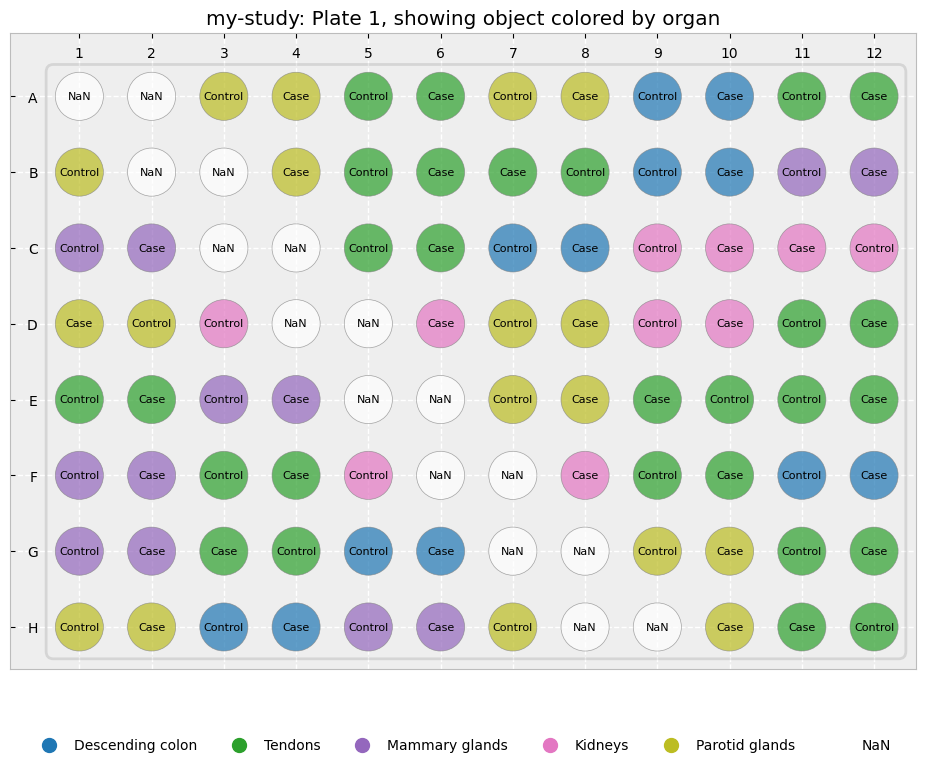

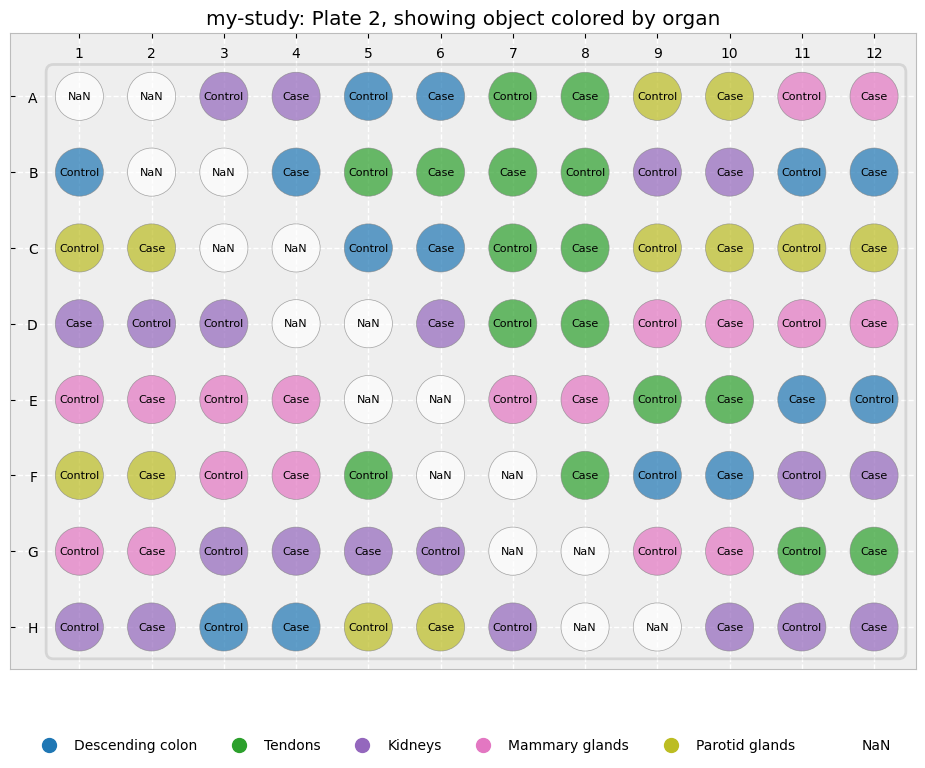

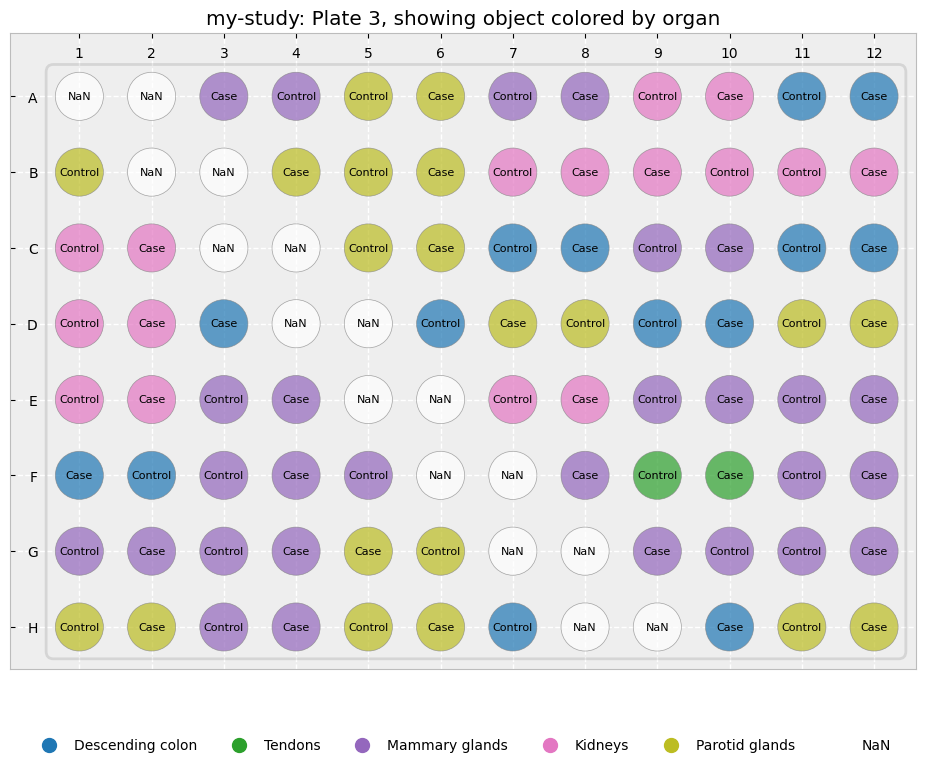

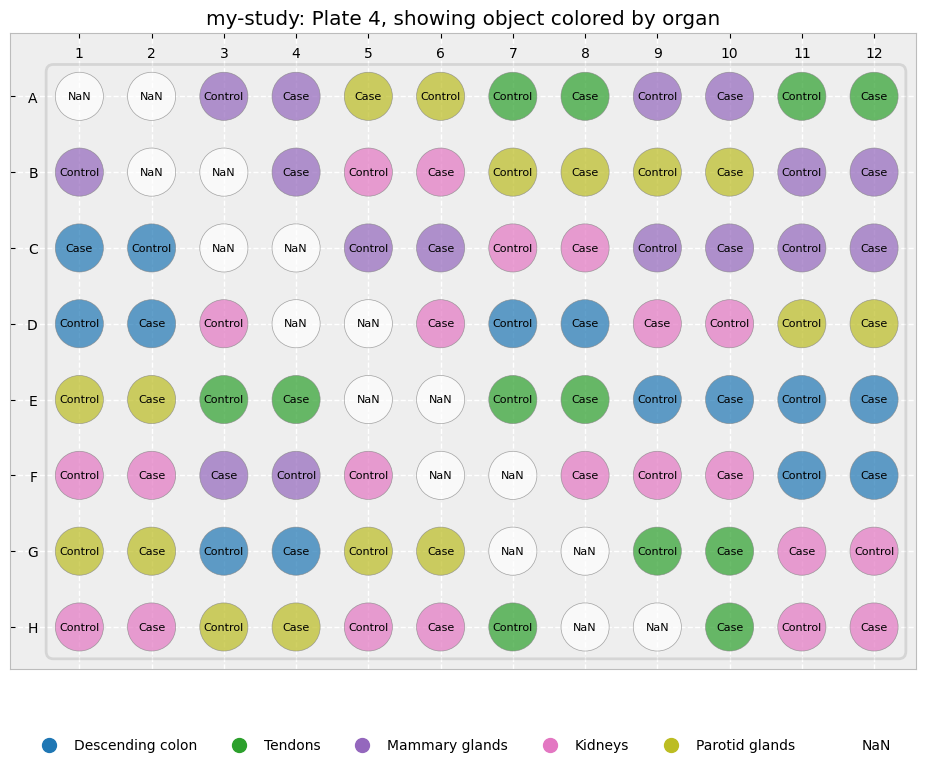

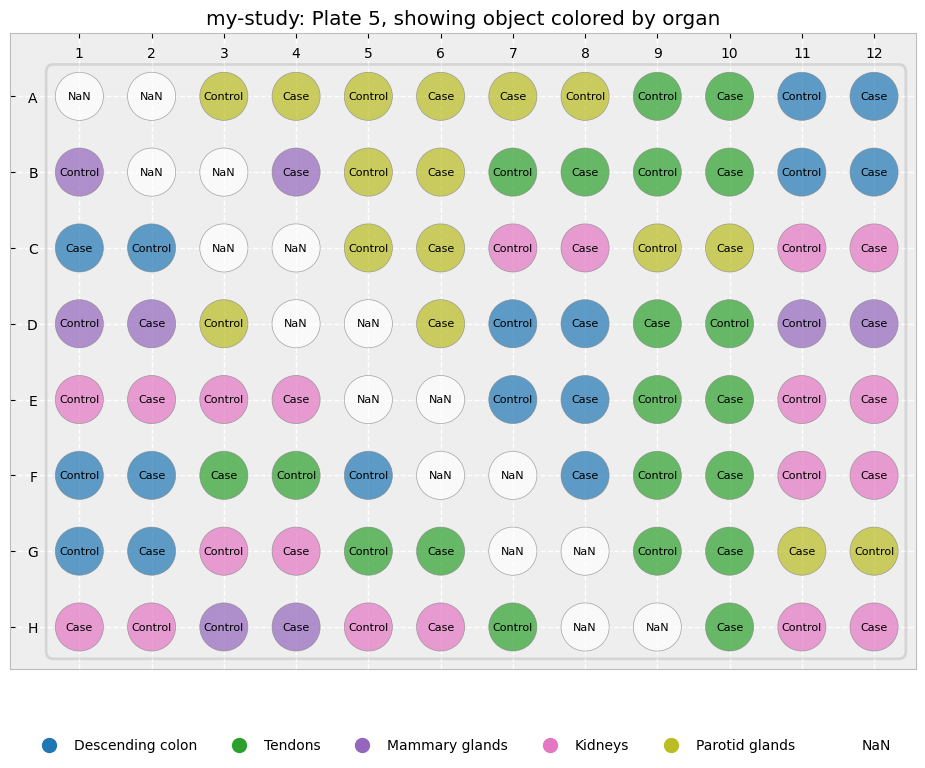

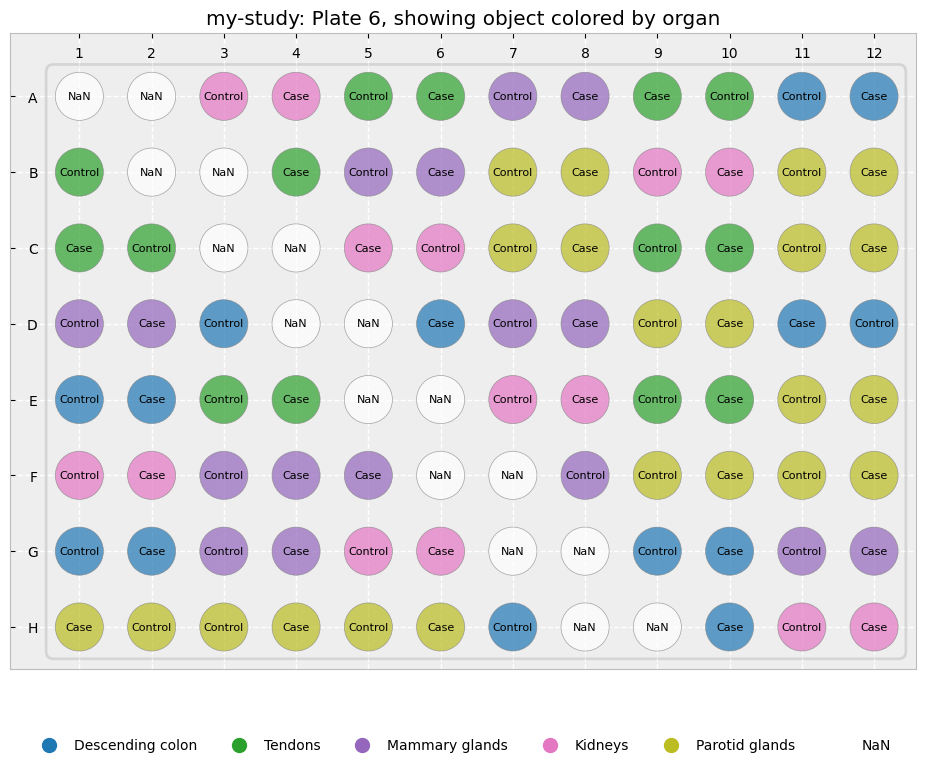

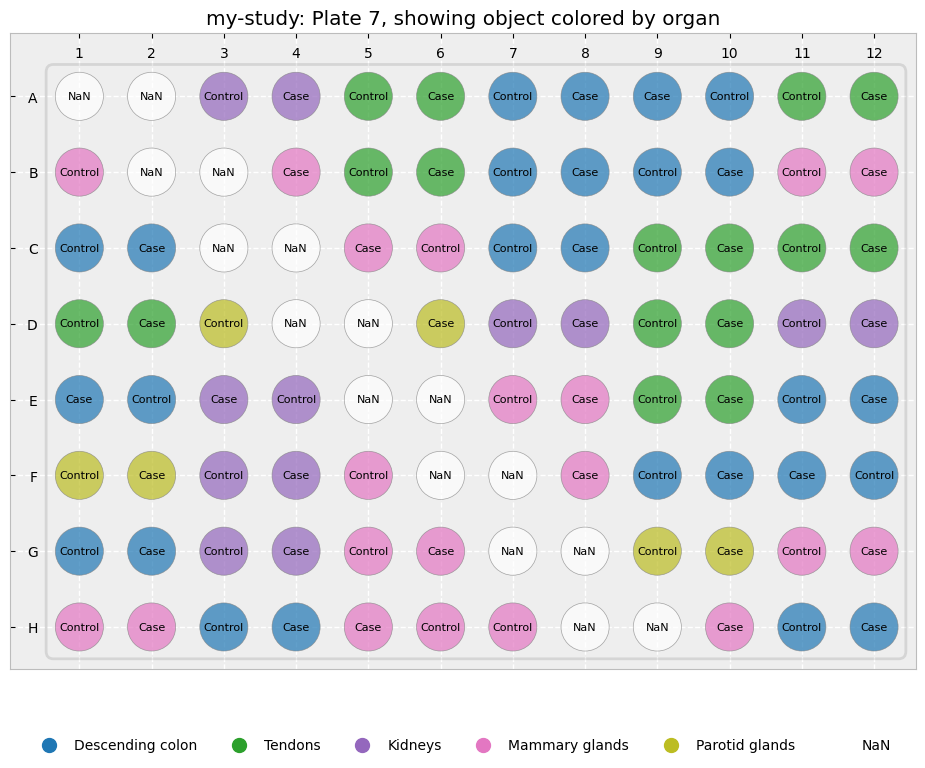

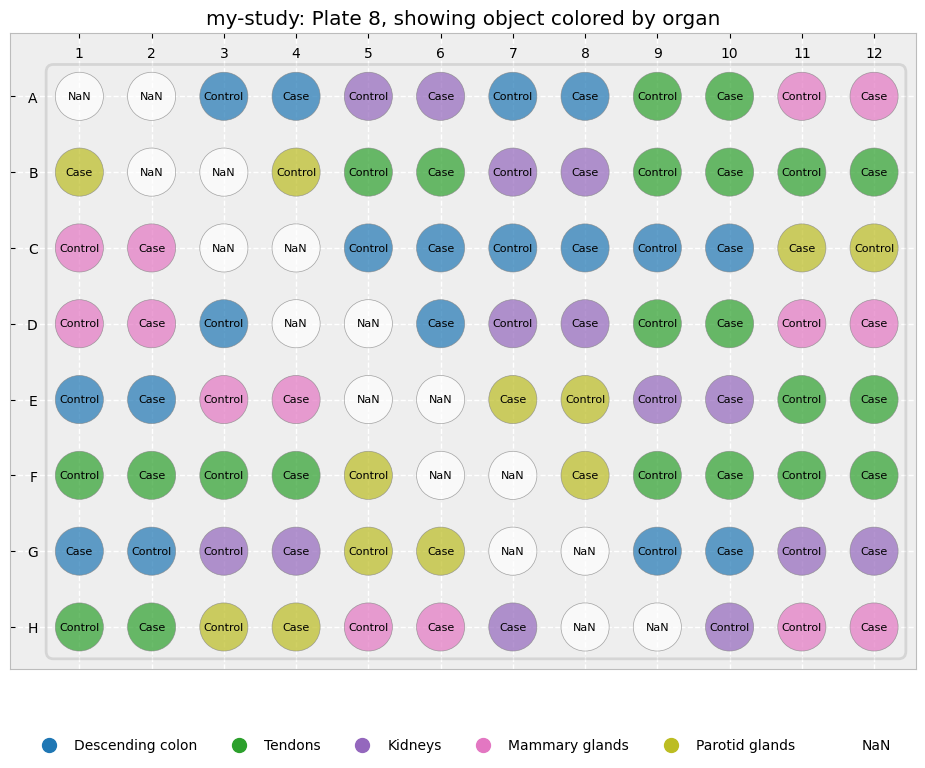

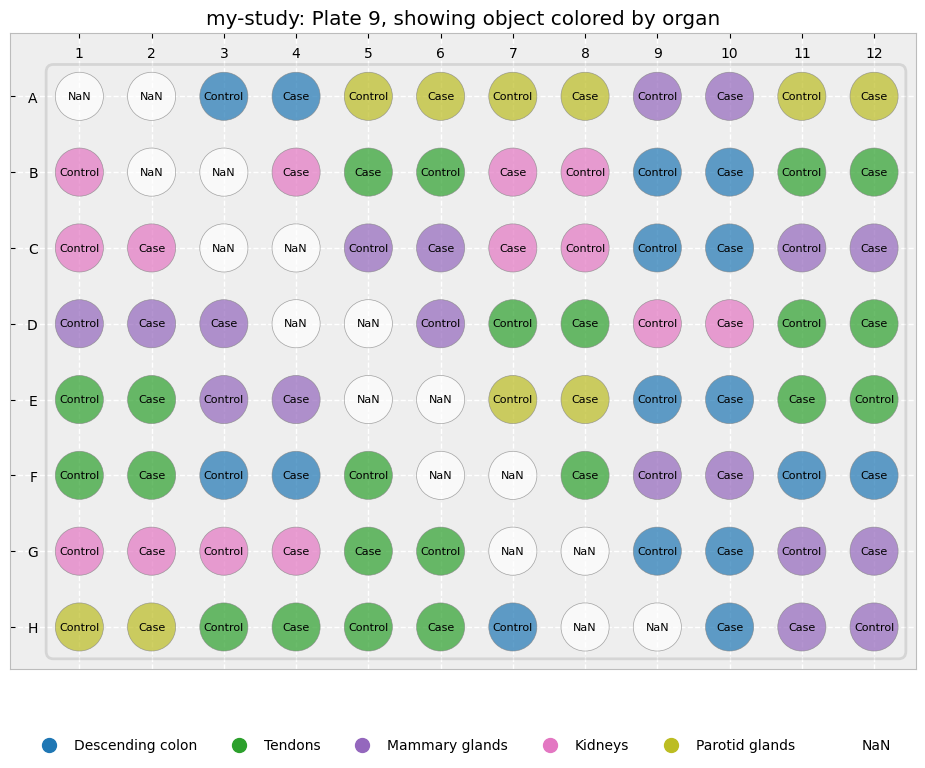

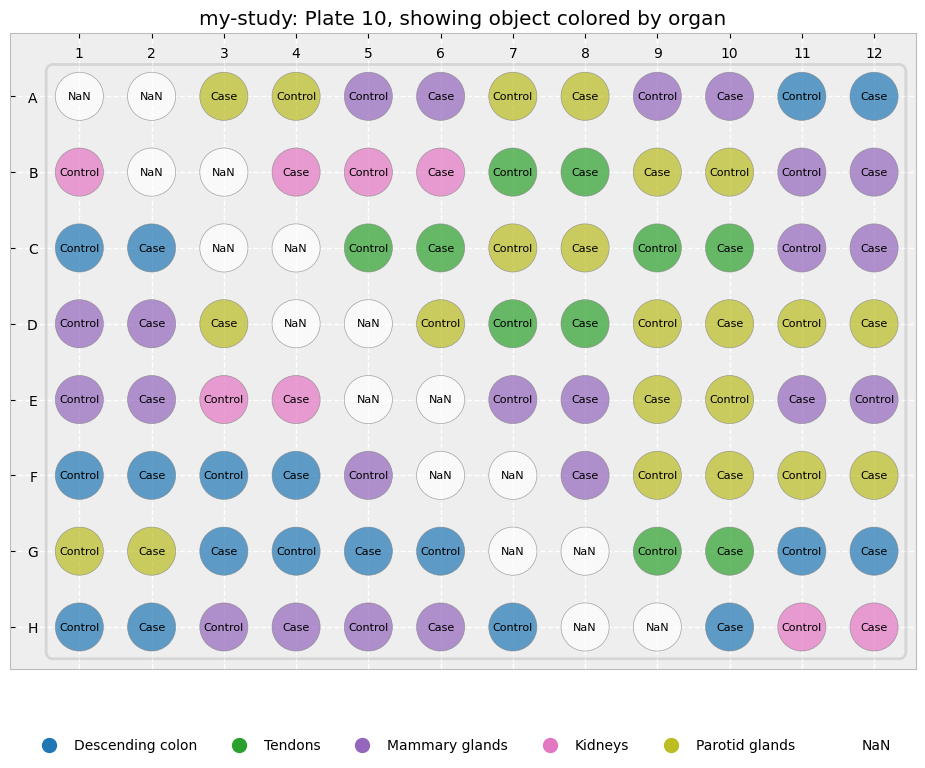

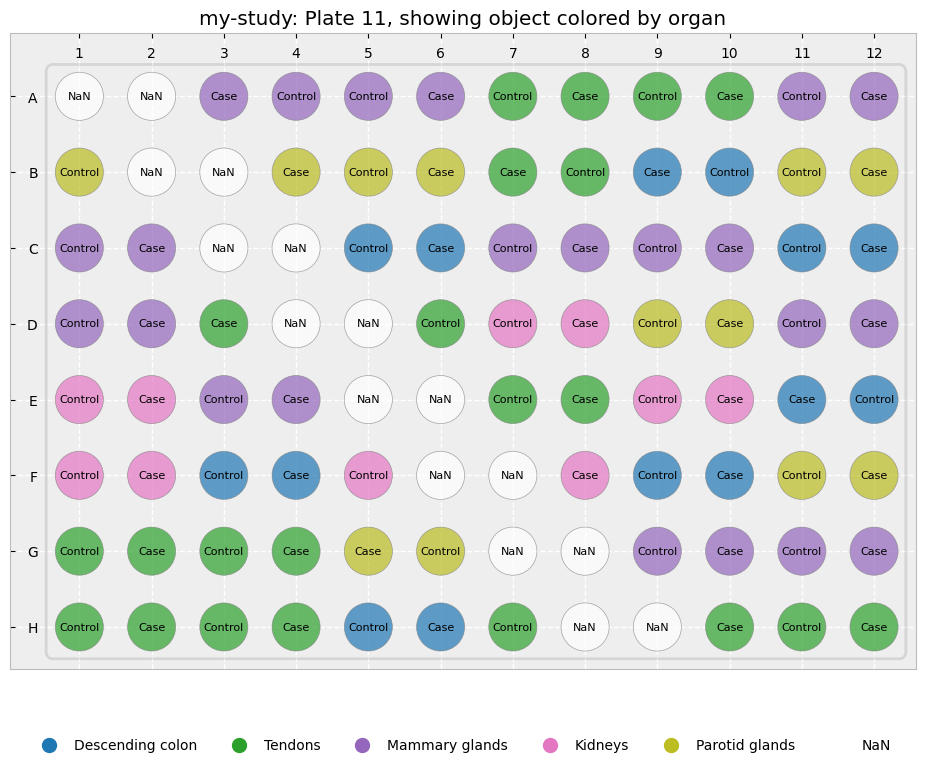

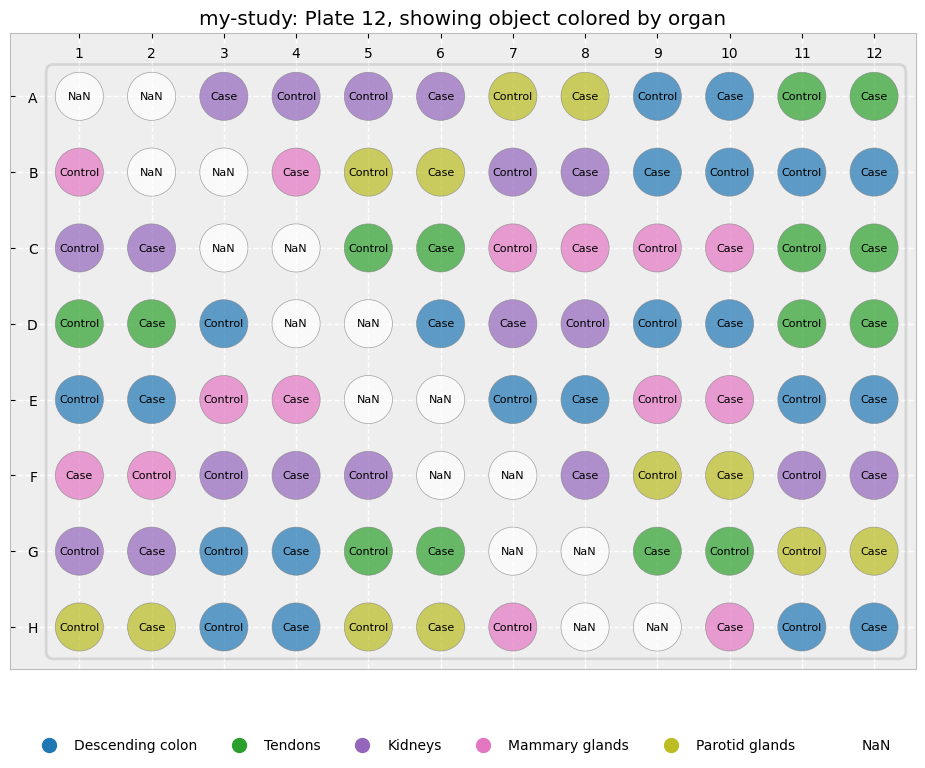

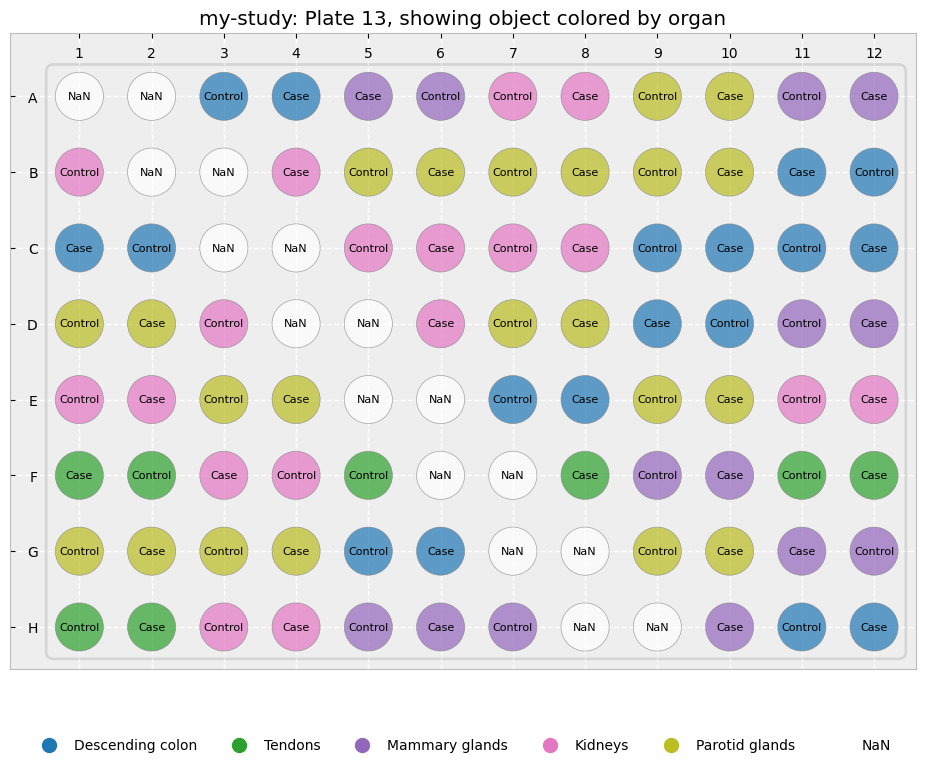

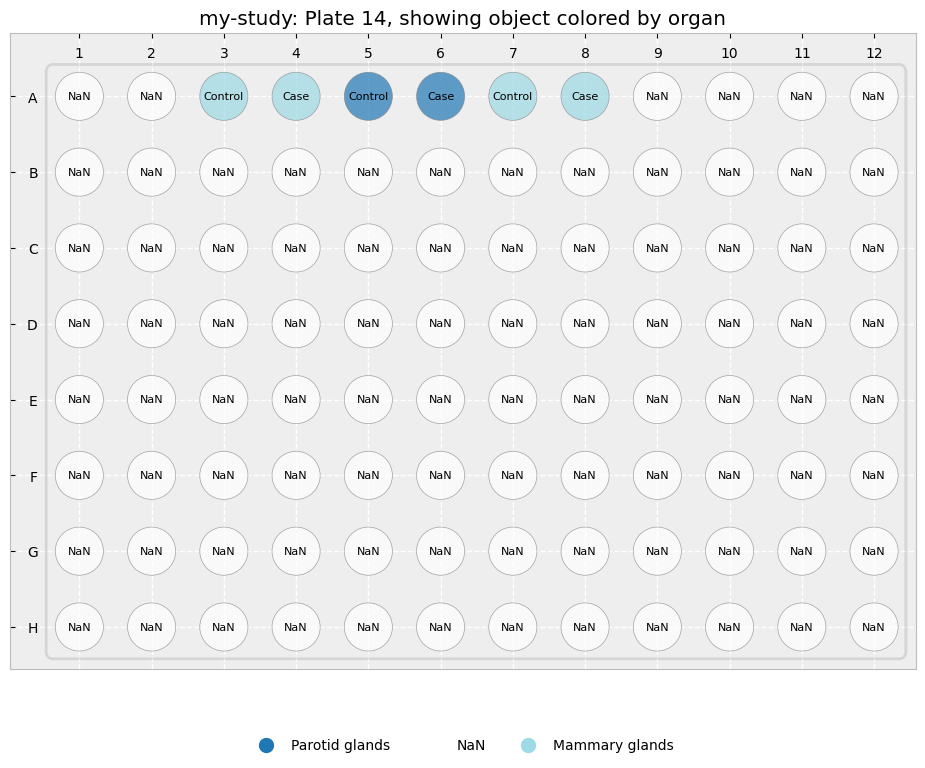

In [54]:
test_study.to_layout_figures(annotation_metadata_key="pair_ID", color_metadata_key="organ")